In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from functions import *
import cv2

In [2]:
path = 'D:\\Daria\\uni\\MS\\'

In [88]:
no = '01_47'

In [89]:
f = '\\png\\IM000009.png'

In [90]:
img = cv2.imread(path + no + f,3) #read img
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grayscale

In [91]:
b,g,r = cv2.split(img)
img3 = cv2.merge([r,g,b]) # revert to rgb
edges = cv2.Canny(img, 100,150) # apply canny

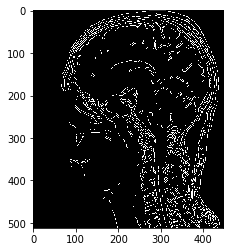

In [92]:
view(edges)

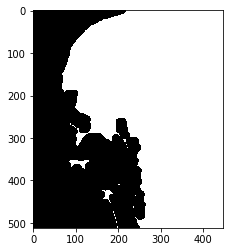

In [93]:
clos = close(edges, 20)
view(floodfill(clos))

In [94]:
newcl = ~clos.copy()

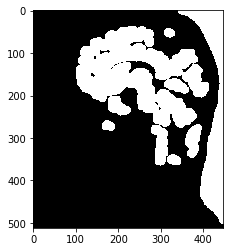

In [95]:
newcl[floodfill(clos) == False] = 0
view(newcl)

In [96]:
ret, markers = cv2.connectedComponents(newcl)
marker_area = [np.sum(markers == m) for m in range(np.max(markers)) if m != 0] 
largest_component = np.argmax(marker_area) + 1 #Add 1 since we dropped zero above                        

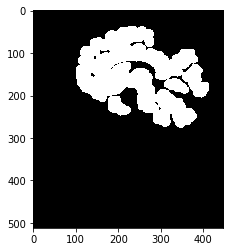

In [97]:
brain_mask = markers == largest_component
view(brain_mask)

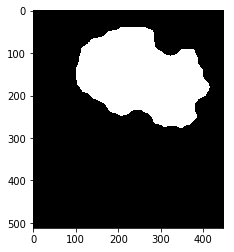

In [98]:
closs = close(brain_mask.astype('uint8'), 50)
view(closs)

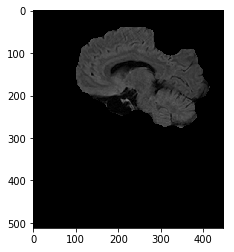

In [100]:
heh = applymask(img, closs)
view(heh)

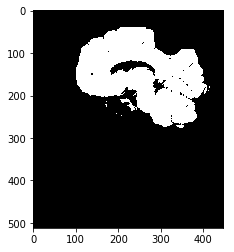

In [112]:
graynorm = cv2.cvtColor(heh, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(graynorm,0,255,cv2.THRESH_OTSU)
view(thresh)

In [114]:
_, contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

In [115]:
hull = [cv2.convexHull(cnt) for cnt in contours]

In [117]:
cnt = contours[0]

hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,5,[0,0,255],-1)

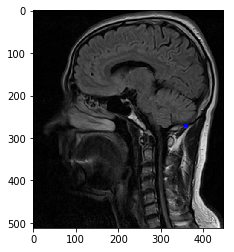

In [118]:
view(img)

In [76]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

In [77]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

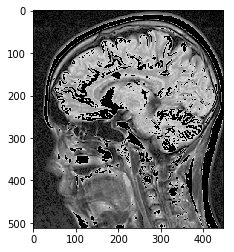

In [78]:
img2 = cdf[gray]
mask_0 = img2 < 220
nofat = applymask(cdf[img], mask_0)
view(nofat)

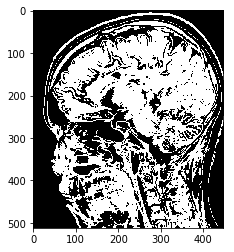

In [79]:
graynorm = cv2.cvtColor(nofat, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(graynorm,0,210,cv2.THRESH_OTSU)
ret, markers = cv2.connectedComponents(thresh)
view(thresh)

In [83]:
#brain_mask = remgar(thresh)
#brain_mask = np.uint8(brain_mask)
#clean = tophat(thresh, kernel(10))
#view(clean)
#ker = np.ones((3,3), np.uint8) 
#erosion = cv2.erode(clean, ker, iterations=1) 
closing_2 = close(thresh, 3)
closing_2 = np.uint8(closing_2)
mask_2 = floodfill(closing_2)
exp = remgar(mask_2)
exp = close(exp, 10)
exp = floodfill(exp)
segm = applymask(img, exp)

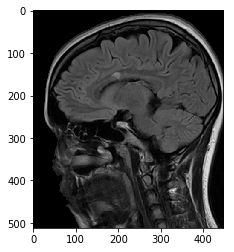

In [84]:
view(segm)